In [1]:
import visual_behavior.database as db
from visual_behavior.utilities import EyeTrackingData

import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
print(plotly.__version__)

4.5.0


In [3]:
osid = 839565100
ed = EyeTrackingData(osid)

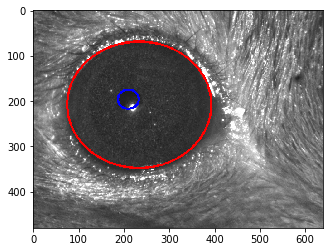

In [4]:
fig,ax=plt.subplots()
ax.imshow(ed.get_annotated_frame(1000))

In [54]:
n_rows = n_cols = 10
scale_factor = 4 # make images smaller to reduce filesize of saved plot

n_frames = n_rows*n_cols
frames = np.linspace(0,len(ed.ellipse_fits['pupil'])-1,n_frames).astype(int)
subplot_titles = ['frame = {}'.format(f) for f in frames]

fig = make_subplots(
    rows=n_rows, 
    cols=n_cols, 
    shared_xaxes=False, 
    shared_yaxes=False, 
    subplot_titles=subplot_titles,
    horizontal_spacing = 0.0,
    vertical_spacing = 0.02
)
idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        im = ed.get_annotated_frame(frames[idx])
        resized_im = cv2.resize(im,(int(im.shape[1]/scale_factor),int(im.shape[0]/scale_factor)))
        fig.add_trace(go.Image(z=resized_im), row=row+1, col=col+1)
        fig.update_yaxes(showticklabels=False, row=row+1, col=col+1)
        fig.update_xaxes(showticklabels=False, row=row+1, col=col+1)
        idx += 1
for i in fig['layout']['annotations']:
    i['font'] = dict(size=8)

fig.write_html("/home/dougo/eye_matrix_sample.html")


In [57]:
ed.ellipse_fits['pupil'].head()

,center_x,center_y,height,phi,width,area,time,frame,likely_outlier,likely_blinks,blink_corrected_center_x,blink_corrected_center_y,blink_corrected_height,blink_corrected_phi,blink_corrected_width,blink_corrected_area,blink_corrected_likely_outlier,normalized_blink_corrected_area
0,238.296944,198.339746,24.353631,0.204655,27.238174,2330.804608,0.11331,0,False,False,238.296944,198.339746,24.353631,0.204655,27.238174,2330.804608,0.0,0.589156
1,238.312164,198.093834,24.315640,0.157186,27.205897,2325.283852,0.12971,1,False,False,238.312164,198.093834,24.315640,0.157186,27.205897,2325.283852,0.0,0.587761
2,238.488035,198.344184,24.543974,0.075705,27.107249,2308.451485,0.13175,2,False,False,238.488035,198.344184,24.543974,0.075705,27.107249,2308.451485,0.0,0.583506
3,238.197468,198.135188,24.308890,0.129864,27.264270,2335.272785,0.16526,3,False,False,238.197468,198.135188,24.308890,0.129864,27.264270,2335.272785,0.0,0.590286
4,238.315902,198.098864,24.117187,0.122286,27.148865,2315.545097,0.20276,4,False,False,238.315902,198.098864,24.117187,0.122286,27.148865,2315.545097,0.0,0.585299


In [117]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(
        x=ed.ellipse_fits['pupil'].index.values, 
        y=ed.ellipse_fits['pupil'].blink_corrected_area.values
    ),
    row=1, col=1
)
fig.update_layout(
    title="Pupil area vs. frame",
    xaxis_title="frame number",
    yaxis_title="pupil area\n(pixels^2)",
)
fig.write_html("/home/dougo/eye_ts_sample.html")

In [40]:
hsize

400

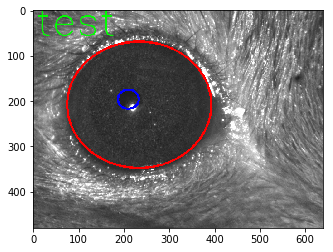

In [80]:


im1 = ed.get_annotated_frame(1000)
im2 = ed.get_annotated_frame(2000)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im1,'test', (5,55), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

fig,ax=plt.subplots()
ax.imshow(im1)

In [81]:
cv2.putText?

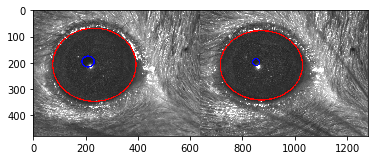

In [68]:
im_concat = np.hstack((im1,im2))
im_concat.shape
fig,ax=plt.subplots()
ax.imshow(im_concat)

In [98]:
int(55/scale_factor)

13

In [113]:
idx = 0
font = cv2.FONT_HERSHEY_SIMPLEX

for row in range(n_rows):
    for col in range(n_cols):
        im = ed.get_annotated_frame(frames[idx])
        im = cv2.resize(im,(int(im.shape[1]/scale_factor),int(im.shape[0]/scale_factor)))
        
        cv2.putText(im,'frame = {}'.format(frames[idx]), (2,int(60/scale_factor)), font, 2.25/scale_factor, (0, 255, 0), 2, cv2.LINE_AA)
        if col == 0:
            im_concat = im
        else:
            im_concat = np.hstack((im_concat,im))
            
        print(row,col,idx,'    ', end='\r')
        idx += 1
        
            
    if row == 0:
        im_all = im_concat
    else:
        im_all = np.vstack((im_all,im_concat))
        
        

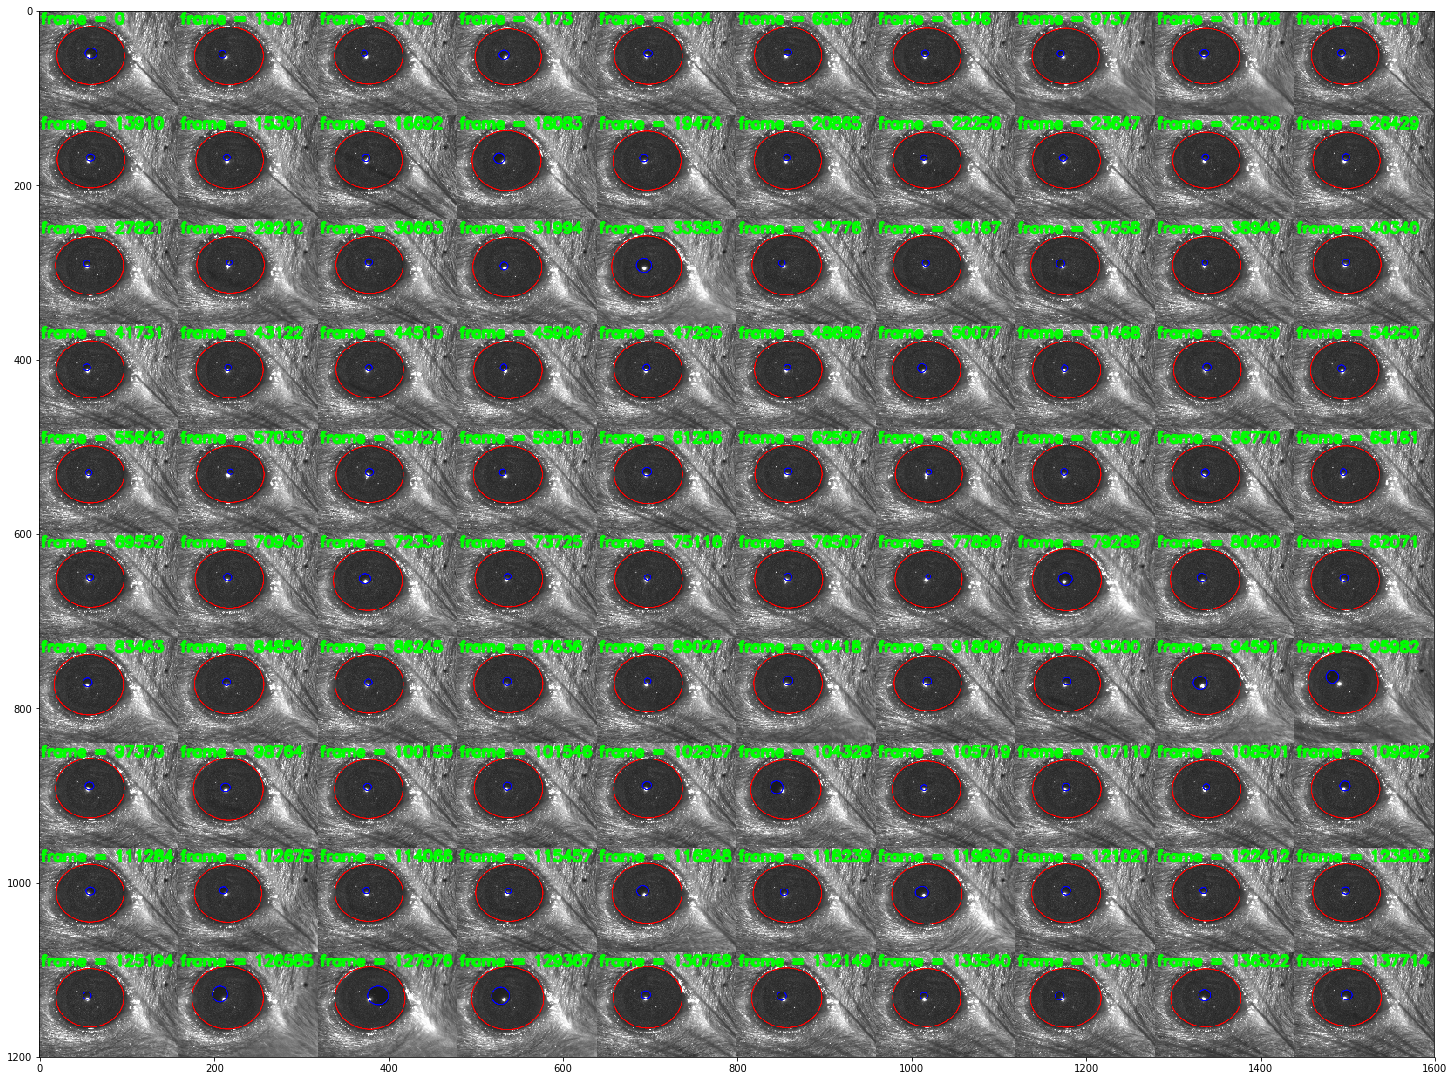

In [115]:
fig,ax=plt.subplots(figsize=(25,20))
ax.imshow(im_all)

In [119]:
fig = make_subplots(
    rows=1, 
    cols=1, 
    shared_xaxes=False, 
    shared_yaxes=False, 
)

fig.add_trace(go.Image(z=im_all), row=1, col=1)
fig.update_yaxes(showticklabels=False, row=1, col=1)
fig.update_xaxes(showticklabels=False, row=1, col=1)

fig.update_layout(
    title="100 frame sample of tracking results",
)

fig.write_html("/home/dougo/eye_matrix_sample_single_image.html")